<a href="https://colab.research.google.com/github/Jordan-me/Neural-networks/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
print("""
                (\\ /) 
                (•.•)  <hello!>
                (")(“) 
                """)


                (\ /) 
                (•.•)  <hello!>
                (")(“) 
                


Step 1: build a logistic neural network

---
```
  input =  mat(2^n,n) ,k hidden neural
  output = one number.
  
```

In [27]:
in_dim = 2
out_dim = 1

In [28]:
def checkInput(num, lim,sign,stopProg,msg):
  if (sign=='>') and (num>lim):
    return True
  elif (sign=='>=') and (num>=lim):
    return True
  elif (sign=='<') and (num<lim):
    return True
  elif (sign=='<=') and (num<=lim):
    return True
  elif (sign=='==') and (num==lim):
    return True
  else:
    if(stopProg):
      raise Exception(msg)
    else:
      return False

In [29]:
class BTU(nn.Module):
  def __init__(self,temp=0.001):
    super(BTU, self).__init__()
    self.temp = temp
  def forward(self,in_values:torch.Tensor)->torch.Tensor:
    return 1/(1+torch.exp(-in_values/self.temp))

In [44]:
class Linear(nn.Module):
  def __init__(self, in_features: int, out_features: int,layer_name:str, biasV: bool = True, device=None, dtype=None) -> None:
    kwargs = {'device': device, 'dtype': dtype} #device=  the desired device of returned tensor (CPU/CUDA), dtype = data type of returned tensor. 
    super(Linear, self).__init__()
    self.in_features = in_features
    self.out_features = out_features
    self.layer_name = layer_name
    #creat an empty tensor input_dimXoutput_dim for vector(w)
    self.weight = nn.Parameter(torch.empty((in_features, out_features), **kwargs))
    #create an empty tensor 1Xoutput_dim for vector(b)
    if biasV: 
      self.bias = nn.Parameter(torch.empty(out_features, **kwargs))
    else:
      self.register_parameter('bias', None)
    # self.set_weights(self.weight,self.bias)

    #Initializes vector(w),vector(b)
  def set_weights(self, w, b):
    #TODO: validate size of empty tensor befor initialize it
    checkInput(self.weight.size(),w.size(),"==",True,"Error initializing vector w")
    checkInput(self.bias.size(),b.size(),"==",True,"Error initializing vector b")
    self.weight = nn.Parameter(torch.tensor(w))
    if self.bias is not None:
      self.bias = nn.Parameter(torch.tensor(b))


    
    #Implement the z function--> z=vetor(w)x+vector(b)
  def forward(self, input: torch.Tensor) -> torch.Tensor:
    return torch.matmul(input, self.weight) + self.bias # * is elementwise
    
  def print_params(self) -> str:
    return 'layer_name = {}\nin_features={}\nw={}\n,b={}, out_features={}'.format(
           self.layer_name,self.in_features,self.weight,self.bias , self.out_features
           )



In [77]:
class LogisticNetwork2(nn.Module):
  def __init__(self,num_hidden=1,bypass=True):
    super().__init__()
    checkInput(num_hidden, 1,">=",True,"The number of neurons in the hidden layer should be K>=1")
    self.bypass = bypass
    self.hidden = Linear(in_dim, num_hidden,'Hidden layer' ) #in_dim = number of input
    # self.output_layer = Linear(num_hidden, out_dim,'Output layer')
    if self.bypass:
      self.output_layer = Linear(num_hidden + in_dim, out_dim,'Output layer')
       
    else:
      self.output_layer = Linear(num_hidden, out_dim,'Output layer')
      
    self.BTU = BTU()
  def set_weights(self, w, b, layer="h"):
    if layer == "output":
      self.output_layer.set_weights(w, b)
    else:
      self.hidden.set_weights(w, b)
  def forward(self, input):
    self.input = input
    z1 = self.hidden(input)
    y1 = self.BTU(z1)
    if self.bypass:
      y1_concat = torch.cat((input, y1), 1)
      z2 = self.output_layer(y1_concat)

    else:
      z2 = self.output_layer(y1)
    self.final_output = self.BTU(z2)
    return self.BTU(z2)

  def print_network(self)->None:
    print('Network input:\n{}\nNetwork output:\n{}\n '.format(self.input,self.final_output))
    #print hidden layer
    print(self.hidden.print_params())
    print()
    #print output layer
    print(self.output_layer.print_params())


In [61]:
def Loss(x, t,model ,print_deltas=False):
  squared_deltas = torch.square(model(x) - t) ## SSE
  if print_deltas:
    print(squared_deltas)
  return torch.sum(squared_deltas)

Step 2: Initialize the network to function as an XOR function
- Calculate the values manually
- We will see the results

In [62]:
x_in = torch.Tensor([[0,0],[0,1], [1,0], [1,1]]) #Represents the input (truth table rows)
target = torch.Tensor([[0],[1],[1],[0]])

Check the model for:  
hidden = 2, in_dim = 2, bypass =False  
results are:  

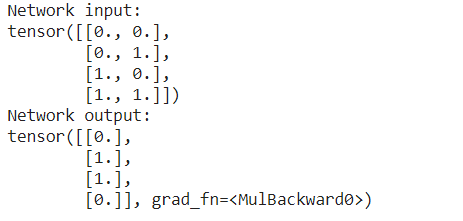  

Hidden layer:  
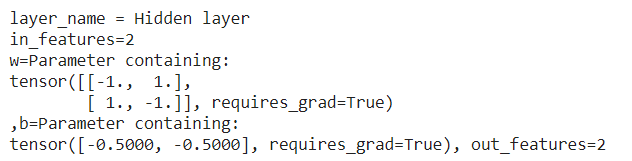  

output:  
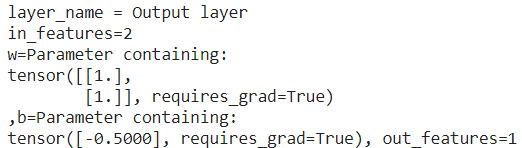  

LOSS value =   
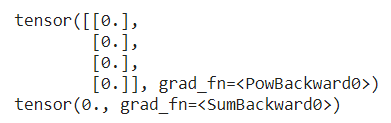

In [ ]:
model1 = LogisticNetwork2(2,bypass=False) #n=2, k=2 (num hidden)

w1 = torch.Tensor([[-1.0,1.0],[1.0,-1.0]]) #w of hidden layer
b1 = torch.Tensor([-0.5,-0.5])#bias of hidden layer
model1.set_weights(w1,b1)

w2 = torch.Tensor([[1.0],[1.0]])
b2 = torch.Tensor([-0.5])
model1.set_weights(w2,b2,"output")

model1(x_in)
model1.print_network()

Loss(x_in, target,model1, True)

Check the model for:  
hidden = 1, in_dim = 2, bypass =True  
results are:  
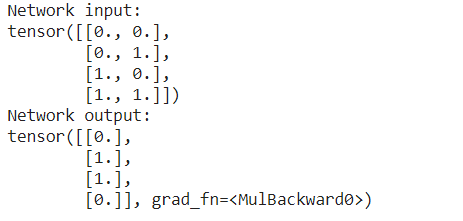  

Hidden layer:  
accept only- x1=1,x2=1  

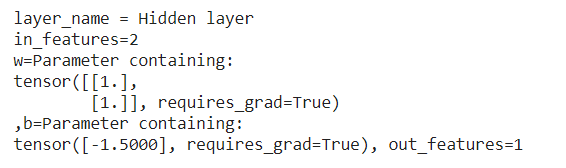   
  
Output Layer:  
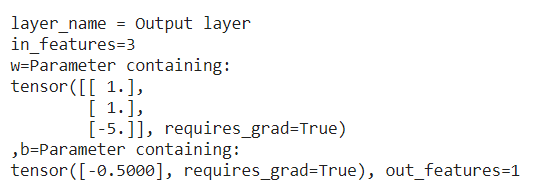  
  
LOSS value =  
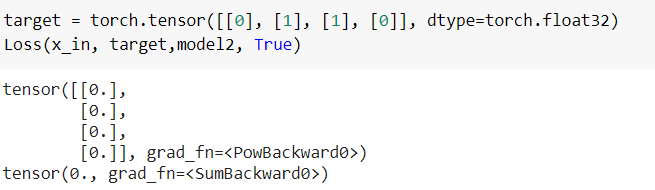


In [ ]:
model2 = LogisticNetwork2(1,bypass=True) #n=2, k=1 (num hidden)

w1 = torch.Tensor([[1.0],[1.0]]) #w of hidden layer
b1 = torch.Tensor([-1.5])#bias of hidden layer
model2.set_weights(w1,b1)

w2 = torch.Tensor([[1.0],[1.0],[-5.0]])
b2 = torch.Tensor([-0.5])
model2.set_weights(w2,b2,"output")

model2(x_in)
model2.print_network()

Loss(x_in, target,model2, True)


Check the model for:  
hidden = 4, in_dim = 2, bypass = False  
results are:  

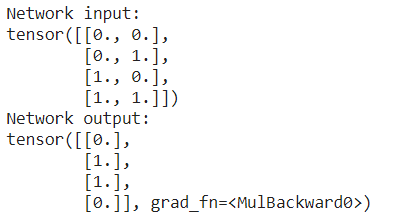  

Hidden Layer=  
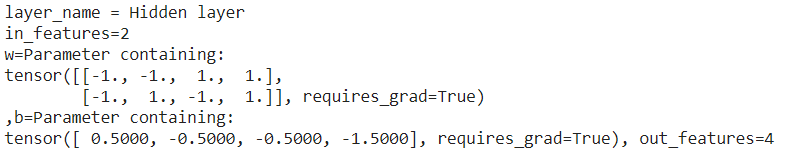  

Output Layer =   
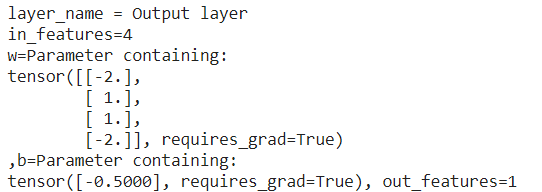  

LOSS value =   
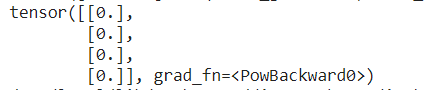  


In [80]:
model4 = LogisticNetwork2(4,bypass=False) #n=2, k=4 (num hidden)

w1 = torch.Tensor([[-1.0,-1.0,1.0,1.0],[-1.0,1.0,-1.0,1.0]]) #w of hidden layer
b1 = torch.Tensor([0.5,-0.5,-0.5,-1.5])#bias of hidden layer
model4.set_weights(w1,b1)

w2 = torch.Tensor([[-2.0],[1.0],[1.0],[-2.0]])
b2 = torch.Tensor([-0.5])
model4.set_weights(w2,b2,"output")

model4(x_in)
model4.print_network()

Loss(x_in, target,model4, True)

Network input:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
Network output:
tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<MulBackward0>)
 
layer_name = Hidden layer
in_features=2
w=Parameter containing:
tensor([[-1., -1.,  1.,  1.],
        [-1.,  1., -1.,  1.]], requires_grad=True)
,b=Parameter containing:
tensor([ 0.5000, -0.5000, -0.5000, -1.5000], requires_grad=True), out_features=4

layer_name = Output layer
in_features=4
w=Parameter containing:
tensor([[-2.],
        [ 1.],
        [ 1.],
        [-2.]], requires_grad=True)
,b=Parameter containing:
tensor([-0.5000], requires_grad=True), out_features=1
tensor([[0.],
        [0.],
        [0.],
        [0.]], grad_fn=<PowBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor(0., grad_fn=<SumBackward0>)

##Conclusions:  

---



*   When performing a bypass, pay attention to the order of the weights of the output layer.  
*   The hidden layer output is concat to the weight vector on the right side, so make sure to put the weight there for the output of the hidden layer.


*   The LOSS value will always give 0 in this case because it is a full match to the output values of the XOR function.
*   Note the dimensions of the matrices and mark them as: [[w for x1],[w for x2],[w for x3],etc...]!!!  




  






Step 3:
calculate SSE

In [ ]:
target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
Loss(x_in, target,model1, True)

In [81]:
print("""
                (\\ /) 
                (•.•)  <Bye!>
                (")(“) 
                """)


                (\ /) 
                (•.•)  <Bye!>
                (")(“) 
                
